<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_3_2_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

In [19]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_3.2'

In [21]:
os.listdir(base_path)

['data_add_delta_3.2_n20.csv',
 'data_add_delta_3.2_n30.csv',
 'data_add_delta_3.2_n60.csv',
 'data_add_delta_3.2_n120.csv',
 'data_add_delta_3.2_n250.csv']

In [22]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,85.435084,59.197102,56.841571,1.151378e+05,1.153493e+05,-51630.942002,1.669802e+05
1,0.0,1.0,29.595926,85.955689,39.411768,-8.521498e+05,-8.519848e+05,-614959.794001,-2.370250e+05
2,0.0,2.0,54.992034,54.376991,90.737216,9.277305e+04,9.298315e+04,-37686.472452,1.306696e+05
3,0.0,3.0,45.611256,87.578401,21.793315,-2.987989e+06,-2.987824e+06,-610095.121850,-2.377729e+06
4,0.0,4.0,49.777853,82.038017,85.463142,-9.793473e+05,-9.791201e+05,-422986.229693,-5.561338e+05
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,26.824159,71.107312,38.362490,-6.878411e+05,-6.876948e+05,130428.859691,-8.181237e+05
59996,999.0,56.0,57.087234,69.904032,43.997655,-3.608224e+05,-3.606414e+05,133389.384524,-4.940308e+05
59997,999.0,57.0,59.423662,35.946445,86.254076,9.915369e+04,9.934531e+04,-122677.372425,2.220227e+05
59998,999.0,58.0,22.676000,60.370528,32.761278,2.758536e+05,2.759794e+05,113895.563261,1.620839e+05


In [23]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,85.435084,59.197102,56.841571,1.151378e+05,1.153493e+05,-51630.942002,1.669802e+05
1,0.0,1.0,29.595926,85.955689,39.411768,-8.521498e+05,-8.519848e+05,-614959.794001,-2.370250e+05
2,0.0,2.0,54.992034,54.376991,90.737216,9.277305e+04,9.298315e+04,-37686.472452,1.306696e+05
3,0.0,3.0,45.611256,87.578401,21.793315,-2.987989e+06,-2.987824e+06,-610095.121850,-2.377729e+06
4,0.0,4.0,49.777853,82.038017,85.463142,-9.793473e+05,-9.791201e+05,-422986.229693,-5.561338e+05
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,26.824159,71.107312,38.362490,-6.878411e+05,-6.876948e+05,130428.859691,-8.181237e+05
59996,999.0,56.0,57.087234,69.904032,43.997655,-3.608224e+05,-3.606414e+05,133389.384524,-4.940308e+05
59997,999.0,57.0,59.423662,35.946445,86.254076,9.915369e+04,9.934531e+04,-122677.372425,2.220227e+05
59998,999.0,58.0,22.676000,60.370528,32.761278,2.758536e+05,2.759794e+05,113895.563261,1.620839e+05


In [24]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3             e             Y          y_hat         e_hat
rep   index                                                                                          
0.0   0.0    85.435084  59.197102  56.841571  1.151378e+05  1.153493e+05  -51630.942002  1.669802e+05
      1.0    29.595926  85.955689  39.411768 -8.521498e+05 -8.519848e+05 -614959.794001 -2.370250e+05
      2.0    54.992034  54.376991  90.737216  9.277305e+04  9.298315e+04  -37686.472452  1.306696e+05
      3.0    45.611256  87.578401  21.793315 -2.987989e+06 -2.987824e+06 -610095.121850 -2.377729e+06
      4.0    49.777853  82.038017  85.463142 -9.793473e+05 -9.791201e+05 -422986.229693 -5.561338e+05
...                ...        ...        ...           ...           ...            ...           ...
999.0 55.0   26.824159  71.107312  38.362490 -6.878411e+05 -6.876948e+05  130428.859691 -8.181237e+05
      56.0   57.087234  69.904032  43.997655 -3.608224e+05 -3.606414e+05  133389.384524 -4.940308e+05
      57.0   59.423662  35.946445  86.254076  9.915369e+04  9.934531e+04 -122677.372425  2.220227e+05
      58.0   22.676000  60.370528  32.761278  2.758536e+05  2.759794e+05  113895.563261  1.620839e+05
      59.0   27.676171  77.010825  88.182766 -2.672020e+05 -2.669992e+05  -31376.375657 -2.356228e+05

[60000 rows x 7 columns]

In [25]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3             e             Y          y_hat         e_hat
rep   index                                                                                          
0.0   0.0    85.435084  59.197102  56.841571  1.151378e+05  1.153493e+05  -51630.942002  1.669802e+05
      1.0    29.595926  85.955689  39.411768 -8.521498e+05 -8.519848e+05 -614959.794001 -2.370250e+05
      2.0    54.992034  54.376991  90.737216  9.277305e+04  9.298315e+04  -37686.472452  1.306696e+05
      3.0    45.611256  87.578401  21.793315 -2.987989e+06 -2.987824e+06 -610095.121850 -2.377729e+06
      4.0    49.777853  82.038017  85.463142 -9.793473e+05 -9.791201e+05 -422986.229693 -5.561338e+05
...                ...        ...        ...           ...           ...            ...           ...
999.0 55.0   26.824159  71.107312  38.362490 -6.878411e+05 -6.876948e+05  130428.859691 -8.181237e+05
      56.0   57.087234  69.904032  43.997655 -3.608224e+05 -3.606414e+05  133389.384524 -4.940308e+05
      57.0   59.423662  35.946445  86.254076  9.915369e+04  9.934531e+04 -122677.372425  2.220227e+05
      58.0   22.676000  60.370528  32.761278  2.758536e+05  2.759794e+05  113895.563261  1.620839e+05
      59.0   27.676171  77.010825  88.182766 -2.672020e+05 -2.669992e+05  -31376.375657 -2.356228e+05

[60000 rows x 7 columns]

In [26]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,85.435084,59.197102,56.841571,1.151378e+05,1.153493e+05,-51630.942002,1.669802e+05
1,0.0,1.0,29.595926,85.955689,39.411768,-8.521498e+05,-8.519848e+05,-614959.794001,-2.370250e+05
2,0.0,2.0,54.992034,54.376991,90.737216,9.277305e+04,9.298315e+04,-37686.472452,1.306696e+05
3,0.0,3.0,45.611256,87.578401,21.793315,-2.987989e+06,-2.987824e+06,-610095.121850,-2.377729e+06
4,0.0,4.0,49.777853,82.038017,85.463142,-9.793473e+05,-9.791201e+05,-422986.229693,-5.561338e+05
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,26.824159,71.107312,38.362490,-6.878411e+05,-6.876948e+05,130428.859691,-8.181237e+05
59996,999.0,56.0,57.087234,69.904032,43.997655,-3.608224e+05,-3.606414e+05,133389.384524,-4.940308e+05
59997,999.0,57.0,59.423662,35.946445,86.254076,9.915369e+04,9.934531e+04,-122677.372425,2.220227e+05
59998,999.0,58.0,22.676000,60.370528,32.761278,2.758536e+05,2.759794e+05,113895.563261,1.620839e+05


In [27]:
table.set_index(['rep', 'index'], inplace=True)

In [28]:
table

x1         x2         x3             e             Y          y_hat         e_hat
rep   index                                                                                          
0.0   0.0    85.435084  59.197102  56.841571  1.151378e+05  1.153493e+05  -51630.942002  1.669802e+05
      1.0    29.595926  85.955689  39.411768 -8.521498e+05 -8.519848e+05 -614959.794001 -2.370250e+05
      2.0    54.992034  54.376991  90.737216  9.277305e+04  9.298315e+04  -37686.472452  1.306696e+05
      3.0    45.611256  87.578401  21.793315 -2.987989e+06 -2.987824e+06 -610095.121850 -2.377729e+06
      4.0    49.777853  82.038017  85.463142 -9.793473e+05 -9.791201e+05 -422986.229693 -5.561338e+05
...                ...        ...        ...           ...           ...            ...           ...
999.0 55.0   26.824159  71.107312  38.362490 -6.878411e+05 -6.876948e+05  130428.859691 -8.181237e+05
      56.0   57.087234  69.904032  43.997655 -3.608224e+05 -3.606414e+05  133389.384524 -4.940308e+05
      57.0   59.423662  35.946445  86.254076  9.915369e+04  9.934531e+04 -122677.372425  2.220227e+05
      58.0   22.676000  60.370528  32.761278  2.758536e+05  2.759794e+05  113895.563261  1.620839e+05
      59.0   27.676171  77.010825  88.182766 -2.672020e+05 -2.669992e+05  -31376.375657 -2.356228e+05

[60000 rows x 7 columns]

In [29]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

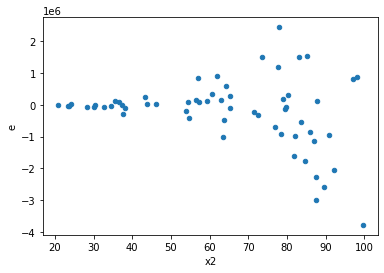

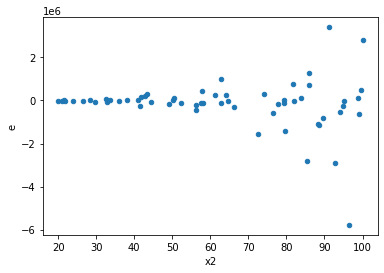

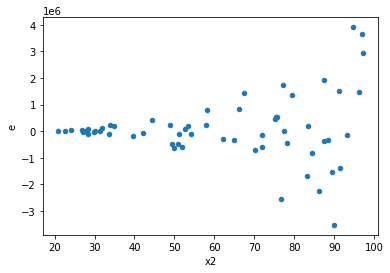

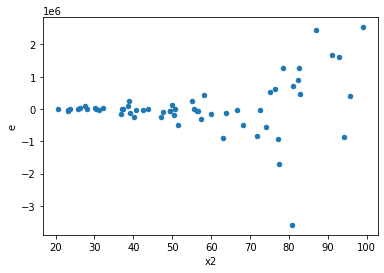

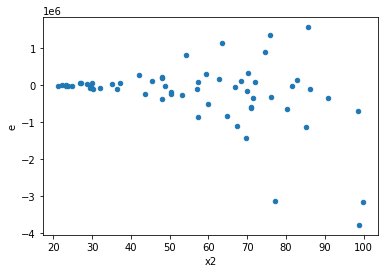

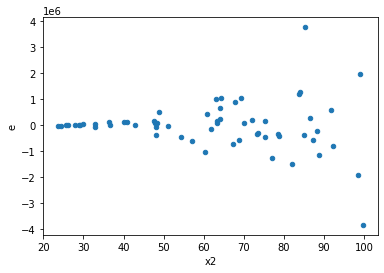

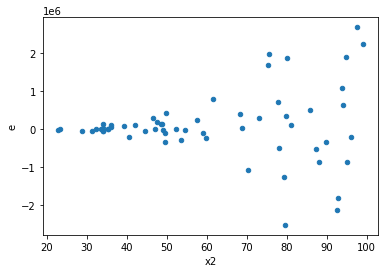

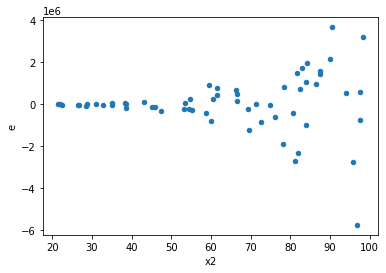

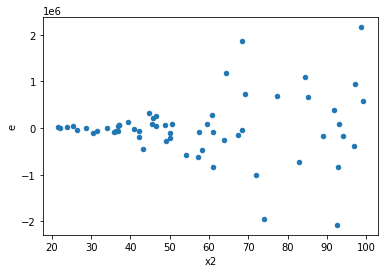

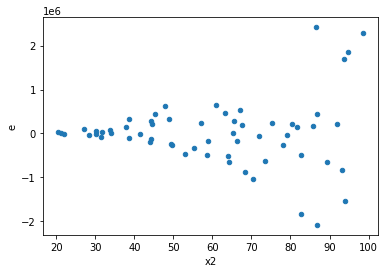

In [30]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [31]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [32]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,21.0,21.0,47697663133863.95,887612785068.5885,2384883156693.1978,44380639253.42943,53.73701678956575,1.7208456881689926e-13,0.999999999999914,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,45501548224995.72,430403309892.7643,2275077411249.786,21520165494.638214,105.71839755677647,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,73174353120181.73,1153492937993.5798,3658717656009.087,57674646899.67899,63.43719212313809,3.175237850427948e-14,0.9999999999999841,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,31588148419881.117,206253319627.52368,1579407420994.056,10312665981.376184,153.152193995843,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,30031934232536.742,380286703210.1711,1501596711626.8372,19014335160.508553,78.97182304567495,3.3306690738754696e-15,0.9999999999999983,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,45559145069429.695,802491310580.6566,2277957253471.485,40124565529.03283,56.772135060832724,9.85878045867139e-14,0.9999999999999507,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,41275557048530.88,171620833153.88818,2063777852426.5442,8581041657.694409,240.50435072483367,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,94019919419708.61,441001078223.2513,4700995970985.431,22050053911.162563,213.19657493470388,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,22493201404695.66,321675885359.34717,1124660070234.783,16083794267.967358,69.92504700676675,1.176836406102666e-14,0.9999999999999941,Reject001=0 : Heteroscedasticity


In [33]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,47697663133863.95,887612785068.5885,2384883156693.1978,44380639253.42943,53.73701678956575,1.7208456881689926e-13,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,45501548224995.72,430403309892.7643,2275077411249.786,21520165494.638214,105.71839755677647,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,73174353120181.73,1153492937993.5798,3658717656009.087,57674646899.67899,63.43719212313809,3.175237850427948e-14,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,31588148419881.117,206253319627.52368,1579407420994.056,10312665981.376184,153.152193995843,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,30031934232536.742,380286703210.1711,1501596711626.8372,19014335160.508553,78.97182304567495,3.3306690738754696e-15,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,45559145069429.695,802491310580.6566,2277957253471.485,40124565529.03283,56.772135060832724,9.85878045867139e-14,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,41275557048530.88,171620833153.88818,2063777852426.5442,8581041657.694409,240.50435072483367,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,94019919419708.61,441001078223.2513,4700995970985.431,22050053911.162563,213.19657493470388,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,22493201404695.66,321675885359.34717,1124660070234.783,16083794267.967358,69.92504700676675,1.176836406102666e-14,Reject001=0 : Heteroscedasticity


In [34]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64